In [9]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn 

print("Pyhton: {}".format(sys.version))
print("Numpy: {}".format(numpy.__version__))
print("Pandas: {}".format(pandas.__version__))
print("Matplotlib: {}".format(matplotlib.__version__))
print("Seaborn: {}".format(seaborn.__version__))
print("Scipy: {}".format(scipy.__version__))
print("Sklearn: {}".format(sklearn.__version__))


Pyhton: 3.8.2 (tags/v3.8.2:7b3ab59, Feb 25 2020, 23:03:10) [MSC v.1916 64 bit (AMD64)]
Numpy: 1.18.5
Pandas: 1.1.4
Matplotlib: 3.2.1
Seaborn: 0.11.0
Scipy: 1.5.4
Sklearn: 0.23.2


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [51]:
# loading necessary dataset
data = pd.read_csv("creditcard.csv")

In [52]:
print(data.shape)

(284807, 31)


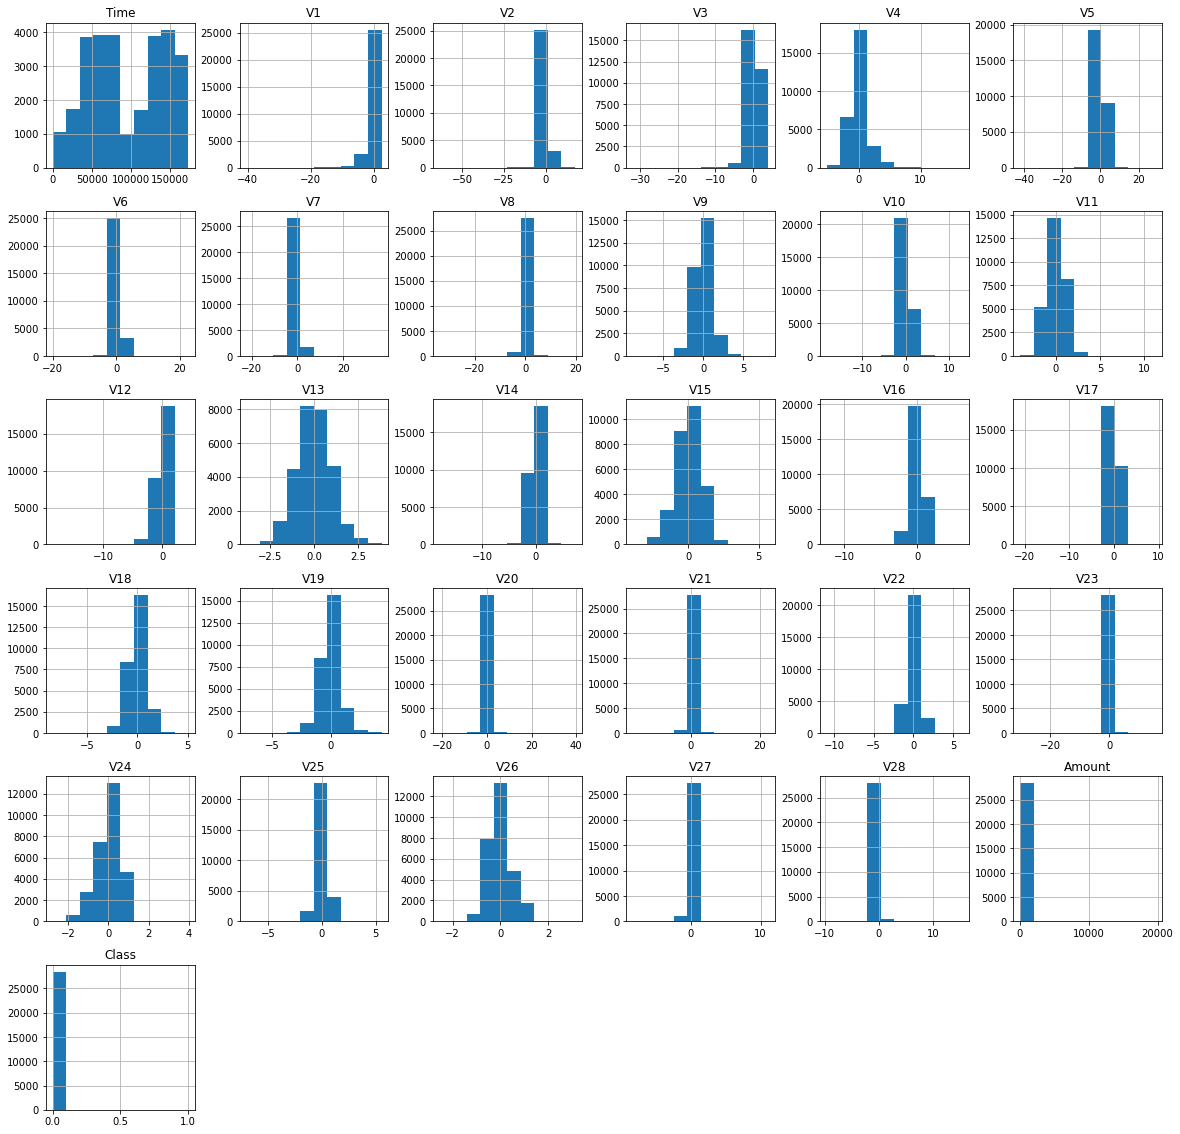

In [16]:
data.hist(figsize = (20 , 20))
plt.show()

In [54]:
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]
outlier_fraction = len(Fraud) / float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))

0.0017304750013189597
Fraud Cases: 492
Valid Cases: 284315


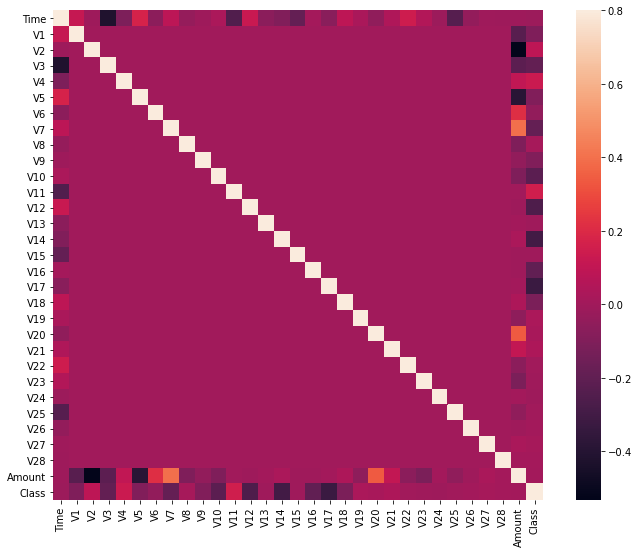

In [55]:
#Building a correaltion matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12 , 9))

sns.heatmap(corrmat , vmax = .8 , square = True)
plt.show()

In [57]:
columns = data.columns.tolist()
columns = [c for c in columns if c not in ['Class']]
target = "Class"
X = data[columns]
Y = data[target]
print(X.shape)
print(Y.shape)


(284807, 30)
(284807,)


In [58]:
from sklearn.metrics import classification_report , accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
state = 1

classifiers = {
    "IsolationForest": IsolationForest(max_samples = (len(X)) , 
                                      contamination = outlier_fraction , 
                                      random_state = state)
    ,
    
    "LocalOutlierFactor": LocalOutlierFactor(n_neighbors = 20 ,
                                            contamination = outlier_fraction)
}

In [60]:
#Fititng the model
n_outliers  = len(Fraud)


for i , (clf_name , clf) in enumerate(classifiers.items()):
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    #reshape the data
    
    y_pred[y_pred == 1] = 0
    
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    #print
    
    print('{}: {}'.format(clf_name , n_errors))
    
    print(accuracy_score(Y , y_pred))
    
    print(classification_report(Y , y_pred))
    
        

    


IsolationForest: 647
0.9977282861727416
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.34      0.34      0.34       492

    accuracy                           1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807



AttributeError: decision_function is not available when novelty=False. Use novelty=True if you want to use LOF for novelty detection and compute decision_function for new unseen data. Note that the opposite LOF of the training samples is always available by considering the negative_outlier_factor_ attribute.